eli5
---
Expliration of the library

In [ ]:
!pip install eli5


     |████████████████████████████████| 112kB 5.2MB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import joblib
import matplotlib as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix

import eli5

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_mv = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"
path_mg = "drive/MyDrive/HCI/hci_code/"
path_nj = "drive/MyDrive/HCI/hci_code/"

# change to your private path
gdrive_project_root = path_mv 

# Load data and replicate the model

In [ ]:
X = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_3cls.csv')
y = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_3cls.csv')
X_train = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_train_3cls.csv')
X_test = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_test_3cls.csv')
y_train = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_train_3cls.csv')
y_test = pd.read_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_test_3cls.csv')

In [ ]:
clf = joblib.load(gdrive_project_root+'models/CLF_3classes_GBM-PHC-AASTR_RandomForest_330estimators_42_random_state.pkl')

In [ ]:
predictions = clf.predict(X_test)
print("Model accuracy: %s \n" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Model accuracy: 0.7674418604651163 

              precision    recall  f1-score   support

           1       0.77      0.81      0.79        42
           2       0.87      0.91      0.89        22
           3       0.63      0.55      0.59        22

    accuracy                           0.77        86
   macro avg       0.76      0.75      0.75        86
weighted avg       0.76      0.77      0.76        86



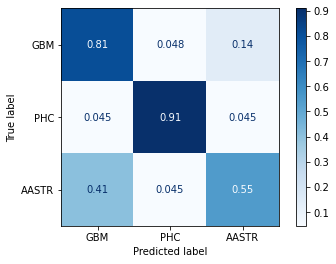

In [ ]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues, display_labels=["GBM", "PHC", "AASTR"], normalize = "true")

In [ ]:
eli5.show_weights(clf, feature_names=list(X.columns))

Weight,Feature
0.3491 ± 0.1366,Mutation Count
0.2335 ± 0.1071,Overall Survival (Months)
0.2328 ± 0.0980,Diagnosis Age
0.1136 ± 0.0778,Overall Survival Status
0.0285 ± 0.0290,Sex
0.0238 ± 0.0327,Somatic Status
0.0101 ± 0.0168,Number of Samples Per Patient
0.0083 ± 0.0171,Age Group
0.0005 ± 0.0030,Additional_cancer


In [ ]:

from eli5 import show_prediction
target_names = ["GBM", "PHC", "AASTR"]
show_prediction(clf, X_test.iloc[3], show_feature_values=True)

Features with largest coefficients per class.

Feature weights are calculated by following decision paths in trees
of an ensemble (or a single tree for DecisionTreeClassifier).
Each node of the tree has an output score, and contribution of a feature
on the decision path is how much the score changes from parent to child.
Weights of all features sum to the output score or proba of the estimator.

Caveats:
1. Feature weights just show if the feature contributed positively or
   negatively to the final score, and does not show how increasing or
   decreasing the feature value will change the prediction.
2. In some cases, feature weight can be close to zero for an important feature.
   For example, in a single tree that computes XOR function, the feature at the
   top of the tree will have zero weight because expected scores for both
   branches are equal, so decision at the top feature does not change the
   expected score. For an ensemble predicting XOR functions it might not be
   a problem, but it is not reliable if most trees happen to choose the same
   feature at the top.

In [ ]:
show_prediction(clf, X_test.iloc[1], show_feature_values=True, target_names=target_names)

In [ ]:
'''

show (List[str], optional) – List of sections to show. Allowed values:

‘targets’ - per-target feature weights;
‘transition_features’ - transition features of a CRF model;
‘feature_importances’ - feature importances of a decision tree or an ensemble-based estimator;
‘decision_tree’ - decision tree in a graphical form;
‘method’ - a string with explanation method;
‘description’ - description of explanation method and its caveats.
'''

for i in range(len(X_test)):
  display(show_prediction(clf, X_test.iloc[1], show_feature_values=True, target_names=target_names))